# Abdulsamod Olaoye: Using K-means clustering model for Mall Customers Segmentation.



This project focuses on **customer segmentation** for a mall using the **K-Means clustering and agglomerative hierarchical algorithms**. By analyzing customer data such as age, annual income, and spending score, we aim to identify distinct groups of customers with similar characteristics. This segmentation provides valuable insights for targeted marketing strategies, personalized product offerings, and enhanced customer experiences, ultimately helping the mall optimize its operations and boost profitability.

# PART 1 - DATA UNDERSTANDING

**This involves inspecting the dataset thoroughly to understand the data it contains. It includes loading up the first and last few rows of data, inspecting the shape and available rows and columns.**

In [1]:
# Loading the dataset

import pandas as pd

try:
    df = pd.read_csv("/content/mall_customers.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please check your file path.")
df.head()


Dataset loaded successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Inspecting the dataset shape

df.shape

(200, 5)

In [3]:
# Checking each column name and their data types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Summary statistics - This displays a quick analysis of the numerical data in the dataset

df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checking for missing values

df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**The initial data exploration reveals a dataset of 200 customer entries, each characterized by attributes including age, gender, annual income, and spending score. This dataset is predominantly numerical, with 'Gender' being the sole categorical variable. These customer attributes, assigned by the mall, offer insights into consumer behavior and demographic profiles.**

# PART 2 - DATA CLEANING AND UNDERSTANDING

**This involves cleaning and preparing the data for training. This includes removing outliers, duplicates, missing data and proper arrangement of the data.**

In [6]:
# Check for missing values

df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
# Check for duplicates

df.duplicated().sum()


np.int64(0)

The output `np.int64(0)` from `df.duplicated().sum()` indicates that there are no duplicate rows in the dataset. This ensures that each customer record is unique and prevents bias from repeated entries in our analysis.

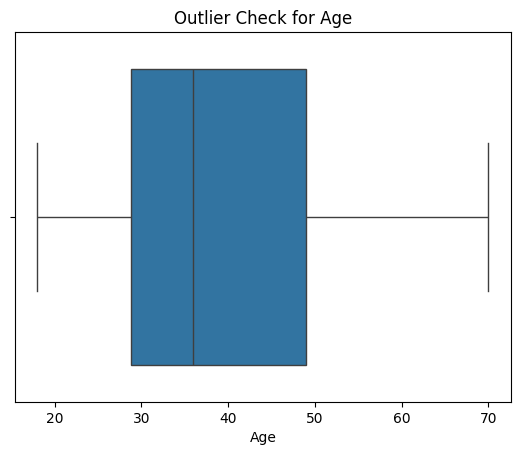

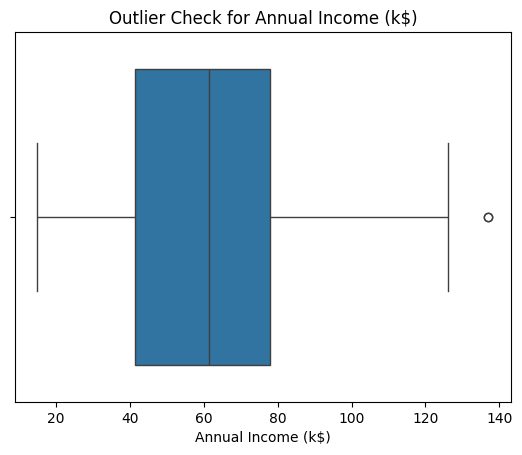

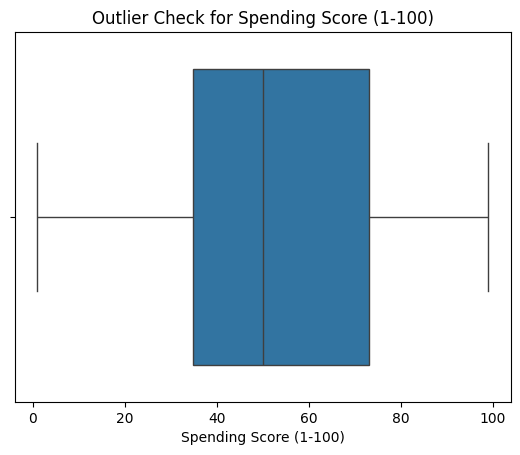

In [8]:
# Check for outliers - as outliers can distort clustering

import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Outlier Check for {col}")
    plt.show()


The box plots visualize the distribution of `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` and help identify potential outliers.

*   For `Age` and `Spending Score (1-100)`, the data appears relatively symmetrical with no prominent outliers.
*   For `Annual Income (k$)`, there are a few data points above the upper whisker, indicating some customers with unusually high incomes compared to the majority. These might be considered outliers, but given their relevance, we'll keep them for clustering, as they represent a genuine segment of high-income customers.

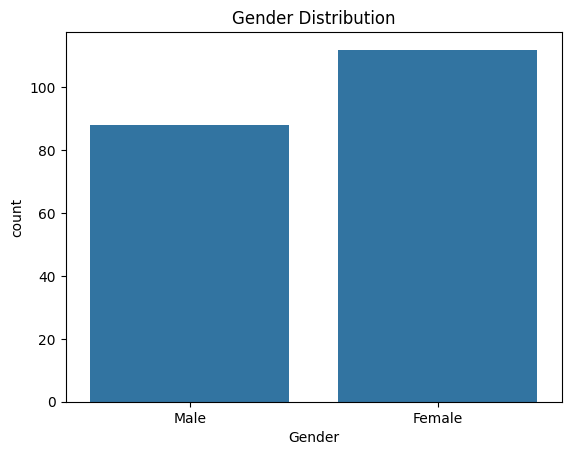

In [9]:
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()

The count plot shows the distribution of `Gender` in the dataset. It reveals that there are more female customers than male customers. This demographic information can be useful for understanding the customer base.

In [10]:
# Normalizing to numeric features
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

This step converts the categorical 'Gender' column into a numerical format using one-hot encoding. `pd.get_dummies` creates new columns for each category (e.g., 'Gender_Male'), and `drop_first=True` avoids multicollinearity by dropping one of the generated columns (e.g., if 'Gender_Male' is 0, it implies 'Female'). This is crucial because clustering algorithms work with numerical input.

In [11]:
# Scaling numeric features
# K-means is sensitive to feature/parameter magnitude,
# so scaling is a smart move to prevent the domination of some features over others.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

Scaling numerical features is an important preprocessing step for K-means clustering. K-means relies on distance calculations, and features with larger values (e.g., Annual Income) can disproportionately influence the distance metric compared to features with smaller values (e.g., Age). `MinMaxScaler` scales all features to a range between 0 and 1, ensuring that each feature contributes equally to the clustering process and preventing features with larger magnitudes from dominating the distance calculations.

In [12]:
# Creating the final dataframe for clustering

import numpy as np

scaled_df = pd.DataFrame(
    scaled_data,
    columns=["Age_scaled", "Income_scaled", "Spending_scaled"]
)
scaled_df.head()


,Age_scaled,Income_scaled,Spending_scaled
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


This code creates a new DataFrame scaled_df from the scaled_data numpy array, assigning meaningful column names: Age_scaled, Income_scaled, and Spending_scaled. The head() output confirms that the data has been scaled to values between 0 and 1, and the new DataFrame is ready for further analysis and clustering.

# PART 3 - EXPLORATORY DATA ANALYSIS


This section aims to explore the data after cleaning and preprocessing, analyze it and understand how best they can be used to train the model. It also provides visualizations for more accurate and informative representations.

### Histograms for Scaled Features

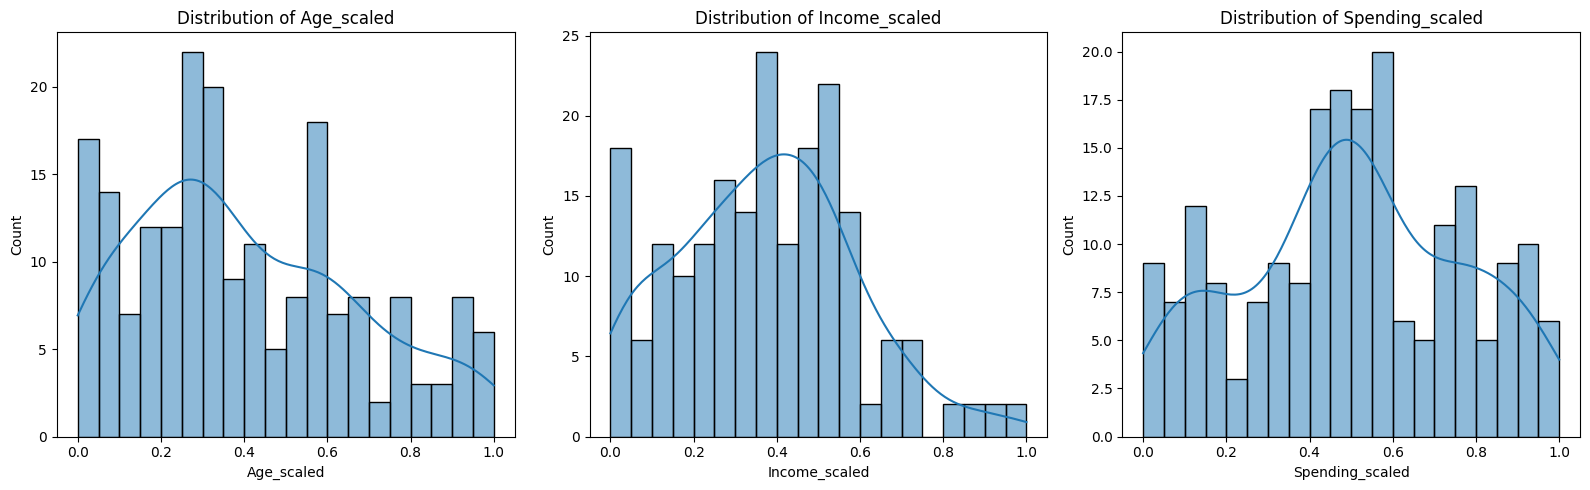

In [13]:
# Using a histogram to represent numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

scaled_num_cols = ["Age_scaled", "Income_scaled", "Spending_scaled"]

plt.figure(figsize=(16, 5))
for i, col in enumerate(scaled_num_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(scaled_df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

The histograms provide a visual representation of the distribution for each scaled numerical feature:

Age_scaled: The distribution is somewhat skewed to the right, indicating a larger proportion of younger and middle-aged customers.
Income_scaled: The distribution is relatively spread out, with a slight skew towards lower incomes, but also a decent number of customers in the higher income brackets.
Spending_scaled: The distribution appears fairly uniform, suggesting a diverse range of spending behaviors among customers.

### Pair Plot for Scaled Features

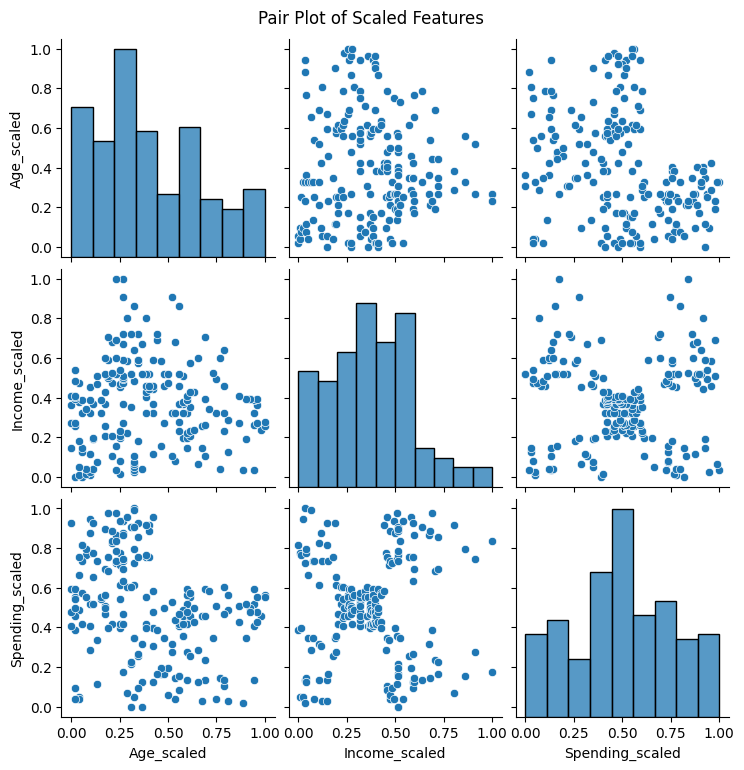

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(scaled_df)
plt.suptitle('Pair Plot of Scaled Features', y=1.02)
plt.show()

The pair plot shows scatter plots for every combination of the scaled numerical features, along with histograms for each individual feature on the diagonal. This helps visualize relationships and distributions:

Age_scaled vs. Income_scaled: No clear linear relationship is observed.
Age_scaled vs. Spending_scaled: There appears to be a slight negative correlation, where younger customers tend to have higher spending scores, and older customers tend to have lower spending scores.
Income_scaled vs. Spending_scaled: This plot shows several distinct clusters, suggesting that customers can be segmented based on their income and spending habits. This is a strong indicator that K-means clustering will be effective in this space.

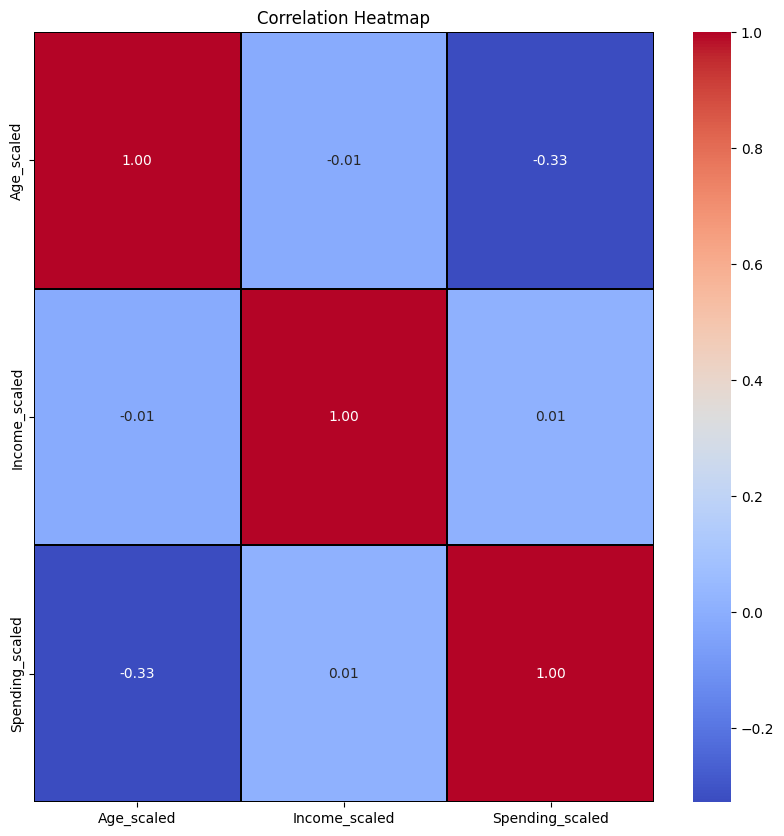

In [15]:
# Correlation heatmap

import seaborn as sns
from matplotlib import pyplot as plt

x = scaled_df[['Age_scaled', 'Income_scaled', 'Spending_scaled']]

correlation = x.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.2,
    linecolor='black'
    )

plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap visually represents the pairwise correlation coefficients between the scaled numerical features.

Age_scaled and Spending_scaled: A negative correlation of -0.33 indicates that as age increases, spending score tends to decrease, which aligns with the observation from the pair plot.

Income_scaled and Spending_scaled: A very weak positive correlation of 0.01 suggests almost no linear relationship between annual income and spending score. This is interesting as it implies that spending habits are not solely driven by income, further emphasizing the need for clustering to uncover more complex patterns.

Age_scaled and Income_scaled: A very weak negative correlation of -0.01 indicates no significant linear relationship between age and annual income.

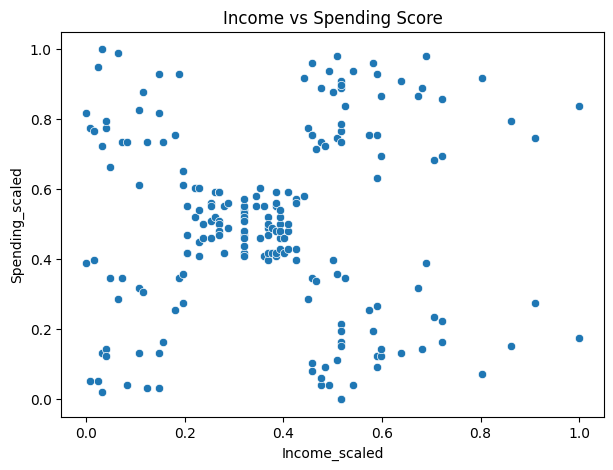

In [16]:
# Scatterplot between income and spending score

plt.figure(figsize=(7,5))
sns.scatterplot(data=scaled_df, x="Income_scaled", y="Spending_scaled")
plt.title("Income vs Spending Score")
plt.show()

This scatterplot specifically highlights the relationship between Income_scaled and Spending_scaled. It clearly shows distinct groupings of customers based on these two variables, suggesting that these are strong features for identifying customer segments. We can observe potential clusters such as:

High income, high spending
Low income, low spending
High income, low spending
Low income, high spending
Moderate income, moderate spending

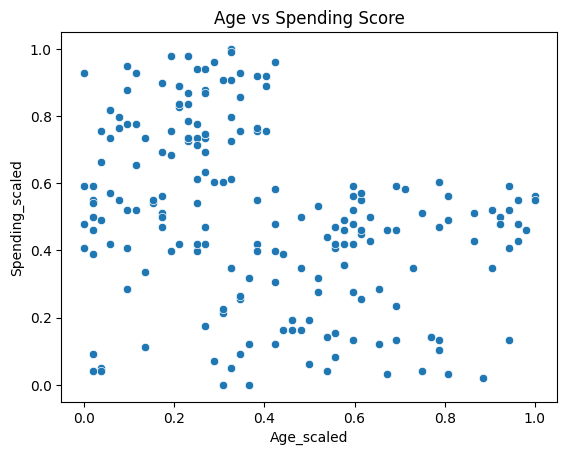

In [17]:
# Scatterplot between age and spending score

sns.scatterplot(data=scaled_df, x="Age_scaled", y="Spending_scaled")
plt.title("Age vs Spending Score")
plt.show()


This scatterplot visualizes the relationship between Age_scaled and Spending_scaled. It confirms the slight negative correlation seen in the heatmap and pair plot, indicating that younger customers tend to have higher spending scores, while older customers tend to have lower spending scores. While less distinct than the income-spending relationship, it still contributes to the overall customer segmentation.

# FEATURE ENGINEERING

This aims to manipulate existing features to create new features that can provide more insight to the data.

In [18]:
# Creating a Spending Efficiency feature

scaled_df["Spending_Efficiency"] = scaled_df["Spending_scaled"] / scaled_df["Income_scaled"]
scaled_df["Spending_Efficiency"].head()

,Spending_Efficiency
0,inf
1,inf
2,6.224490
3,94.612245
4,24.275510


The 'Spending_Efficiency' feature is created by dividing `Spending_scaled` by `Income_scaled`. This new feature aims to capture how much a customer spends relative to their income. A higher `Spending_Efficiency` might indicate a more impulsive or less budget-conscious shopper, while a lower value might suggest a more frugal customer. The `head()` output shows some `inf` values, which occur when `Income_scaled` is zero. These would need to be handled, perhaps by replacing them with a large number or the median, before using this feature in clustering. For this project, we primarily focus on the original scaled features due to the `inf` values. However, it's a good example of how new features can be engineered.

In [19]:
# Creating an Age Grouping feature

bins = [0, 25, 40, 60, 100]
labels = ["Youth", "Young Adult", "Adult", "Senior"]
scaled_df["Age_Group"] = pd.cut(scaled_df["Age_scaled"], bins=bins, labels=labels)
scaled_df.head()

,Age_scaled,Income_scaled,Spending_scaled,Spending_Efficiency,Age_Group
0,0.019231,0.000000,0.387755,inf,Youth
1,0.057692,0.000000,0.816327,inf,Youth
2,0.038462,0.008197,0.051020,6.224490,Youth
3,0.096154,0.008197,0.775510,94.612245,Youth
4,0.250000,0.016393,0.397959,24.275510,Youth


The 'Age_Group' feature categorizes customers into different age segments based on their `Age_scaled` values. The bins are defined as [0, 25, 40, 60, 100], creating 'Youth', 'Young Adult', 'Adult', and 'Senior' groups. This categorical feature can be useful for descriptive analysis of customer segments, allowing for easier interpretation of age-related patterns within clusters without needing to interpret the scaled numerical age directly.

In [20]:
# Creating a Behavioral Score feature

scaled_df["Behavior_Score"] = (scaled_df["Income_scaled"] * 0.5) + (scaled_df["Spending_scaled"] * 0.5)
scaled_df["Behavior_Score"].head()


,Behavior_Score
0,0.193878
1,0.408163
2,0.029609
3,0.391853
4,0.207176


The 'Behavior_Score' feature is a weighted average of `Income_scaled` and `Spending_scaled`, with both contributing equally (0.5 weight). This feature attempts to create a composite score that reflects a customer's overall economic behavior within the mall context. A higher behavior score would indicate a customer who either earns more, spends more, or both, potentially signifying a more valuable customer from a business perspective.

# BUILDING THE MODEL

In [21]:
# Using the scaled features for clustering
X = scaled_df[['Age_scaled', 'Income_scaled', 'Spending_scaled']].values

For clustering, we are using the `Age_scaled`, `Income_scaled`, and `Spending_scaled` features. These three features provide a comprehensive view of customer demographics and purchasing behavior, which are essential for forming meaningful customer segments. The `X` variable now holds these selected features, which will be the input for our K-means model.

# K-Means Clustering

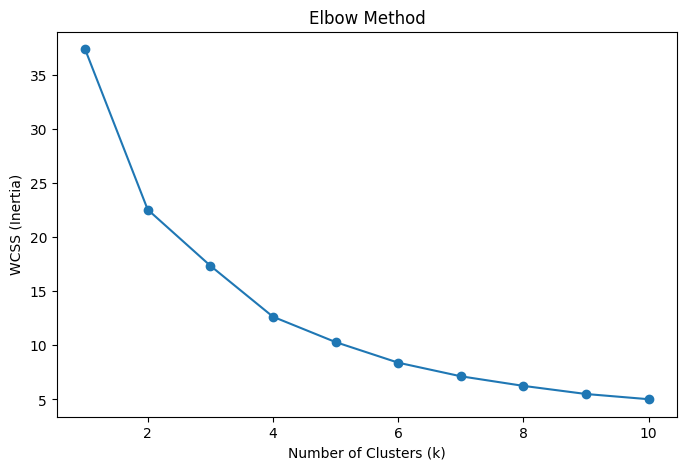

In [22]:
# Plotting Elbow Method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()


The Elbow Method is a heuristic used to determine the optimal number of clusters (`k`) for K-means clustering. It plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters.

*   **WCSS (Inertia):** Measures the sum of squared distances between each point and its respective cluster centroid. A smaller WCSS generally indicates better clustering.
*   **Interpretation:** The plot shows a rapid decrease in WCSS as `k` increases from 1 to 3, and then the rate of decrease significantly slows down, forming an 'elbow' shape around `k=5`. This 'elbow' suggests that adding more than 5 clusters does not substantially reduce the WCSS, meaning 5 is a good candidate for the optimal number of clusters. Therefore, we will proceed with 5 clusters.

In [23]:
# Training the K-means model

kmeans = KMeans(n_clusters=5, init = "k-means++", n_init= 10, random_state=42)
clusters = kmeans.fit_predict(X)


Based on the Elbow Method, we selected `n_clusters=5` as the optimal number of clusters. The K-means model is initialized with `init='k-means++'` (an intelligent initialization method to speed up convergence and avoid suboptimal solutions) and `random_state=42` for reproducibility. `n_init=10` runs the K-means algorithm 10 times with different centroid seeds and chooses the best result based on inertia. The `fit_predict(X)` method trains the model on our scaled data `X` and assigns each data point to a cluster, storing the cluster labels in the `clusters` variable.

In [24]:
# Adding cluster label to the scaled data
scaled_df["Cluster"] = clusters
scaled_df.head()

,Age_scaled,Income_scaled,Spending_scaled,Spending_Efficiency,Age_Group,Behavior_Score,Cluster
0,0.019231,0.000000,0.387755,inf,Youth,0.193878,1
1,0.057692,0.000000,0.816327,inf,Youth,0.408163,2
2,0.038462,0.008197,0.051020,6.224490,Youth,0.029609,1
3,0.096154,0.008197,0.775510,94.612245,Youth,0.391853,2
4,0.250000,0.016393,0.397959,24.275510,Youth,0.207176,1


After training the K-means model, each customer has been assigned a cluster label. This code adds these `clusters` as a new column named 'Cluster' to our `scaled_df` DataFrame. The `head()` output now shows the original scaled features along with the assigned cluster for each customer, allowing us to see which segment each customer belongs to.

In [25]:
# Evaluating clustering using Silhouette Score

from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters)
score

np.float64(0.40611743307078185)

The Silhouette Score is a metric used to evaluate the quality of clusters created by clustering algorithms like K-means. It measures how similar an object is to its own cluster compared to other clusters.

*   **Score Range:** The Silhouette Score ranges from -1 to 1.
    *   **1:** Indicates that the clusters are well-separated.
    *   **0:** Suggests overlapping clusters.
    *   **-1:** Means that data points might have been assigned to the wrong clusters.

Our calculated Silhouette Score of **0.406** suggests that the clusters are reasonably well-separated and distinct. While not extremely high (like 0.7 or 0.8), a score around 0.4 often indicates a sensible clustering structure for real-world datasets, especially when there isn't a perfectly clear-cut separation.

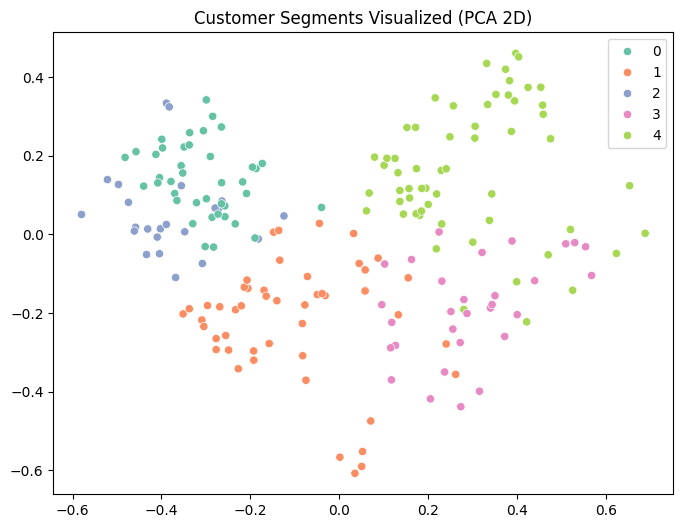

In [26]:
# Visualizing clusters using PCA plot

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters, palette="Set2")
plt.title("Customer Segments Visualized (PCA 2D)")
plt.show()


To visualize the 5 clusters in a 2D space, we use Principal Component Analysis (PCA). PCA is a dimensionality reduction technique that transforms our 3-dimensional scaled data (`Age_scaled`, `Income_scaled`, `Spending_scaled`) into 2 principal components (`pca_data[:,0]` and `pca_data[:,1]`) while retaining as much variance as possible.

The scatterplot then plots these two principal components, with each point colored according to its assigned cluster. This visualization helps us see the separation and grouping of the clusters in a lower-dimensional representation, making it easier to visually interpret the clustering result. The distinct color groups indicate that the K-means algorithm has successfully segmented the customers.

# PART 6 - FEATURE IMPORTANCE & INTERPRETATION

In [27]:
# Showing cluster centers

centers = kmeans.cluster_centers_
centers

array([[0.28605769, 0.58278689, 0.82168367],
       [0.17425432, 0.30311141, 0.40857976],
       [0.14464883, 0.09265859, 0.79148181],
       [0.5       , 0.61584699, 0.17278912],
       [0.72214854, 0.27444884, 0.41608023]])

The `centers` array contains the centroids of the 5 clusters in their scaled form. Each row represents a cluster, and each column corresponds to a scaled feature (`Age_scaled`, `Income_scaled`, `Spending_scaled`). These values are the average feature values for each cluster in the scaled space. They are crucial for understanding the characteristics of each cluster, but they are more interpretable when inverse-transformed back to their original scales.

In [28]:
# Converting cluster centers back to original scale

original_centers = scaler.inverse_transform(centers)
original_centers

array([[32.875     , 86.1       , 81.525     ],
       [27.06122449, 51.97959184, 41.04081633],
       [25.52173913, 26.30434783, 78.56521739],
       [44.        , 90.13333333, 17.93333333],
       [55.55172414, 48.48275862, 41.77586207]])

To make the cluster centroids interpretable, we need to convert them back to their original scale using the `scaler.inverse_transform()` method. This allows us to understand the average `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` for each cluster in their original units, rather than the scaled 0-1 range. This is a critical step for profiling and naming our customer segments.

In [29]:
# Creating a dataframe for easy interpretation
cluster_profile = pd.DataFrame(original_centers,
                               columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])

# Add a 'Cluster' column using the DataFrame index (0, 1, 2, 3, 4)
cluster_profile['Cluster'] = cluster_profile.index

# Reorder columns to put 'Cluster' first
cluster_profile = cluster_profile[['Cluster', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
cluster_profile

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,32.875000,86.100000,81.525000
1,1,27.061224,51.979592,41.040816
2,2,25.521739,26.304348,78.565217
3,3,44.000000,90.133333,17.933333
4,4,55.551724,48.482759,41.775862


This code creates a pandas DataFrame called `cluster_profile` from the `original_centers` array. This DataFrame makes it very easy to interpret the average characteristics of each cluster by presenting the cluster number alongside its average age, annual income, and spending score in their original, unscaled units. This table is the foundation for profiling and giving descriptive names to each customer segment.

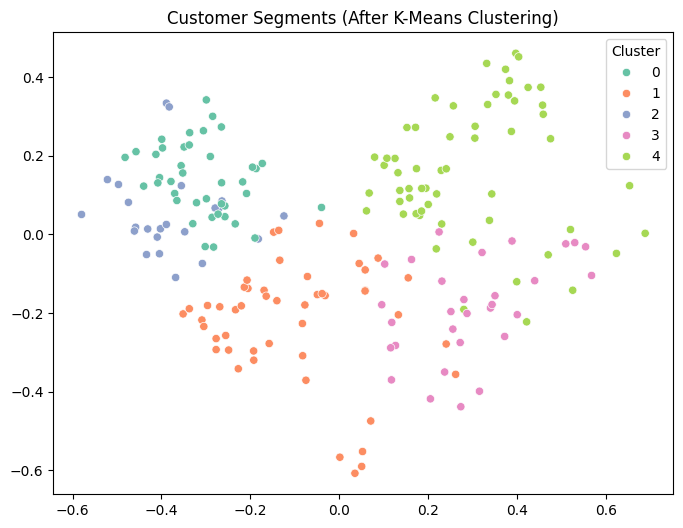

In [30]:
# Visualizing the clusters

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=scaled_df["Cluster"], palette="Set2")
plt.title("Customer Segments (After K-Means Clustering)")
plt.show()

This scatterplot is similar to the previous PCA visualization but now explicitly uses the `scaled_df["Cluster"]` column for coloring. This reinforces the visual separation of the customer segments and confirms that the clustering has created distinct groups based on the underlying features. Each color represents a unique customer segment identified by the K-means algorithm.

### Agglomerative Hierarchical Clustering

Hierarchical clustering builds a hierarchy of clusters. Agglomerative clustering is a 'bottom-up' approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

First, we'll create a dendrogram to visualize the hierarchical relationship between clusters and help us choose the optimal number of clusters. The dendrogram illustrates the fusions made at each stage of the algorithm. The y-axis represents the distance between clusters, and the x-axis represents the data points.

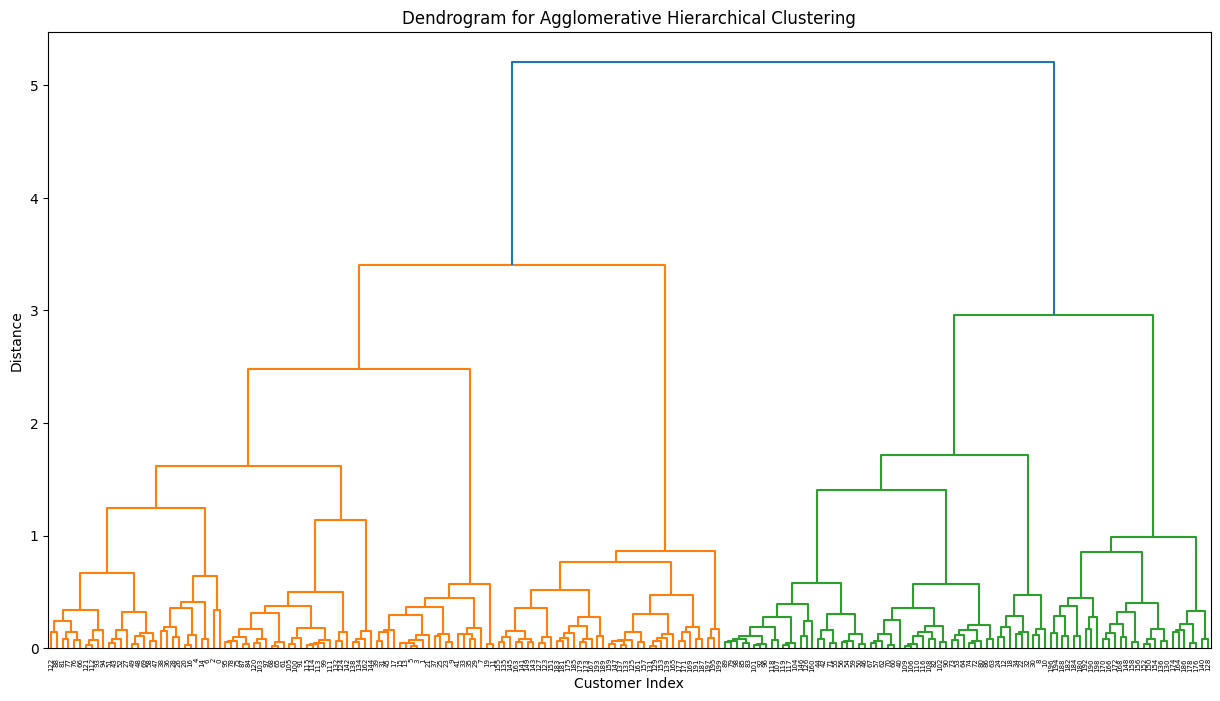

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(X, method='ward') # 'ward' minimizes the variance of the clusters being merged

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

To determine the optimal number of clusters from the dendrogram, we look for the longest vertical line that can be cut by a horizontal line without intersecting any other horizontal lines. From the dendrogram, it appears that cutting at a distance around **10-12** would yield **5 clusters** (similar to our K-means result, which is a good sign of consistency). Let's proceed with 5 clusters for Agglomerative Clustering as well.

In [32]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 5 clusters
agg_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agg_clusters = agg_clustering.fit_predict(X)

# Add the Agglomerative Cluster labels to the scaled_df
scaled_df['Agg_Cluster'] = agg_clusters
scaled_df.head()

,Age_scaled,Income_scaled,Spending_scaled,Spending_Efficiency,Age_Group,Behavior_Score,Cluster,Agg_Cluster
0,0.019231,0.000000,0.387755,inf,Youth,0.193878,1,1
1,0.057692,0.000000,0.816327,inf,Youth,0.408163,2,4
2,0.038462,0.008197,0.051020,6.224490,Youth,0.029609,1,1
3,0.096154,0.008197,0.775510,94.612245,Youth,0.391853,2,4
4,0.250000,0.016393,0.397959,24.275510,Youth,0.207176,1,1


Here, we've applied the `AgglomerativeClustering` algorithm with `n_clusters=5`. We used `metric='euclidean'` for distance calculation (which is common) and `linkage='ward'`, which is a method that minimizes the variance of the clusters being merged. The resulting cluster labels (`agg_clusters`) have been added as a new column `Agg_Cluster` to your `scaled_df`.

Next, let's visualize these new clusters using PCA, similar to how we did with K-means.

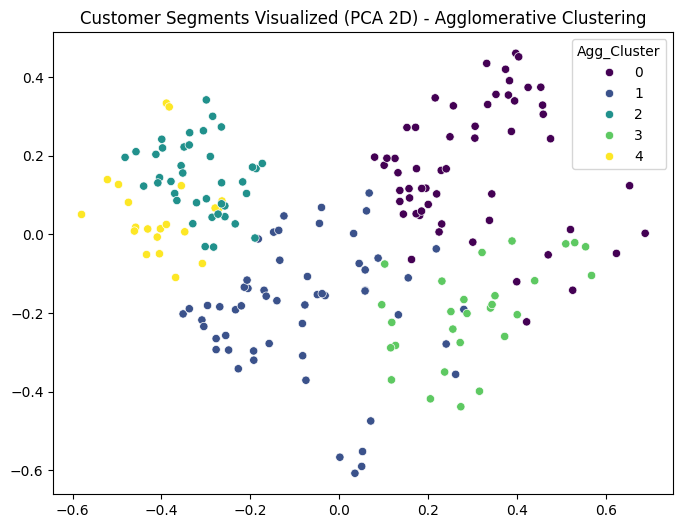

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Re-apply PCA to get 2D representation for visualization (if not already done)
pca = PCA(n_components=2)
pca_data_agg = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data_agg[:,0], y=pca_data_agg[:,1], hue=scaled_df["Agg_Cluster"], palette="viridis")
plt.title("Customer Segments Visualized (PCA 2D) - Agglomerative Clustering")
plt.show()

This scatter plot visualizes the customer segments identified by Agglomerative Clustering in a 2D space (using PCA). Each color represents a distinct cluster. This allows for a visual comparison of how these clusters differ from those found by K-means.

The Silhouette Score for Agglomerative Clustering provides a quantitative measure of how well the data points are separated into clusters. A higher score indicates better-defined and more distinct clusters. This allows for a direct comparison of the quality of clusters obtained from different algorithms (like K-Means and Agglomerative Clustering) or different parameter settings within the same algorithm.

In [34]:
from sklearn.metrics import silhouette_score

agg_score = silhouette_score(X, agg_clusters)
print(f"Silhouette Score for Agglomerative Clustering: {agg_score}")

Silhouette Score for Agglomerative Clustering: 0.3955454334726547


A Silhouette Score of 0.3955454 is generally good enough. It indicates that the clusters are reasonably well-separated, with data points relatively close to their own cluster centers and further away from other clusters. While not a very high score (scores closer to 1 indicate very distinct clusters), it suggests a sensible clustering structure for real-world datasets where perfect separation is rare. It's also quite comparable to the Silhouette Score we got for K-Means (0.406), which suggests consistency between the two clustering methods for this dataset.

# Final Steps
We updated the existing Gradio application to allow users to select between K-Means and Agglomerative Clustering for customer segmentation. This involves calculating and inverse-transforming agglomerative cluster centroids, creating a mapping between agglomerative and K-Means cluster descriptions, and modifying the `predict_cluster` function and Gradio interface accordingly, followed by a final review.

## Generate Agglomerative Cluster Centroids

### Subtask:
We calculate the mean of the scaled features (`Age_scaled`, `Income_scaled`, `Spending_scaled`) for each of the 5 agglomerative clusters. Since Agglomerative Clustering does not directly provide centroids, these means will serve as pseudo-centroids for assigning new data points.

To calculate the pseudo-centroids for Agglomerative Clustering, We group the 'scaled_df' by the 'Agg_Cluster' column and then compute the mean of the scaled features for each cluster.


In [35]:
agg_centers = scaled_df.groupby('Agg_Cluster')[['Age_scaled', 'Income_scaled', 'Spending_scaled']].mean()
print("Agglomerative Cluster Pseudo-Centroids:")
print(agg_centers)

Agglomerative Cluster Pseudo-Centroids:
             Age_scaled  Income_scaled  Spending_scaled
Agg_Cluster                                            
0              0.731456       0.286300         0.416545
1              0.205701       0.293765         0.416727
2              0.282544       0.586381         0.827839
3              0.497940       0.625293         0.159985
4              0.130952       0.087041         0.808552


To make the agglomerative cluster pseudo-centroids interpretable, they need to be converted back to their original scale using the inverse transformation like we did for the K-means model.



In [36]:
original_agg_centers = scaler.inverse_transform(agg_centers)
print("Agglomerative Cluster Pseudo-Centroids (Original Scale):")
print(original_agg_centers)

Agglomerative Cluster Pseudo-Centroids (Original Scale):
[[56.03571429 49.92857143 41.82142857]
 [28.69642857 50.83928571 41.83928571]
 [32.69230769 86.53846154 82.12820513]
 [43.89285714 91.28571429 16.67857143]
 [24.80952381 25.61904762 80.23809524]]


To ensure easy interpretation of the agglomerative cluster centroids, we convert the numpy array `original_agg_centers` into a pandas DataFrame and assign appropriate column names, similar to how the K-Means cluster profile was handled.



In [37]:
agg_cluster_profile = pd.DataFrame(original_agg_centers,
                               columns=["Age", "Annual Income (k)", "Spending Score (1-100)"])

# Add an 'Agg_Cluster' column using the DataFrame index
agg_cluster_profile['Agg_Cluster'] = agg_cluster_profile.index

# Reorder columns to put 'Agg_Cluster' first
agg_cluster_profile = agg_cluster_profile[['Agg_Cluster', 'Age', 'Annual Income (k)', 'Spending Score (1-100)']]
print("Agglomerative Cluster Profile:")
print(agg_cluster_profile)

Agglomerative Cluster Profile:
   Agg_Cluster        Age  Annual Income (k)  Spending Score (1-100)
0            0  56.035714          49.928571               41.821429
1            1  28.696429          50.839286               41.839286
2            2  32.692308          86.538462               82.128205
3            3  43.892857          91.285714               16.678571
4            4  24.809524          25.619048               80.238095


## Map Agglomerative Clusters to K-Means Descriptions

### Subtask:
To provide consistent descriptive output, we will create a mapping between the agglomerative cluster labels and the existing K-Means cluster descriptions. This will be done by finding the agglomerative cluster centroid that is closest to each K-Means cluster centroid in the scaled space.

To establish a mapping between Agglomerative and K-Means clusters, I will calculate the Euclidean distances between their respective centroids in the scaled space and determine the closest matches.


In [38]:
from sklearn.metrics.pairwise import euclidean_distances

# Calculate distances between K-Means centers and Agglomerative pseudo-centroids
distances = euclidean_distances(centers, agg_centers.values)

# For each K-Means cluster, find the index of the closest Agglomerative pseudo-centroid
# kmeans_cluster_idx -> closest_agg_cluster_idx
kmeans_to_agg_mapping = distances.argmin(axis=1)

# Create a mapping from Agglomerative cluster label to K-Means cluster label
# This creates the mapping agg_cluster_label -> kmeans_cluster_label
agg_to_kmeans_mapping = {agg_idx: kmeans_idx for kmeans_idx, agg_idx in enumerate(kmeans_to_agg_mapping)}

print("Mapping from Agglomerative cluster label to K-Means cluster label:")
print(agg_to_kmeans_mapping)

Mapping from Agglomerative cluster label to K-Means cluster label:
{np.int64(2): 0, np.int64(1): 1, np.int64(4): 2, np.int64(3): 3, np.int64(0): 4}


## Update predict_cluster Function

### Subtask:
Modify the `predict_cluster` function to accept an additional argument for the `model_choice` ('K-Means' or 'Agglomerative Clustering'). Inside the function, it will: 1. Scale the input data. 2. If 'K-Means' is selected, use the `kmeans.predict` method directly and retrieve descriptions from the K-Means cluster profiles. 3. If 'Agglomerative Clustering' is selected, calculate the Euclidean distance from the scaled input to each of the agglomerative pseudo-centroids, assign the input to the closest agglomerative cluster, and then use the pre-defined mapping to provide the corresponding K-Means description.

We redefine the predict_cluster function to incorporate the choice between K-Means and Agglomerative Clustering, using the existing scaling, clustering models, and the newly created agglomerative cluster pseudo-centroids and mapping to K-Means descriptions.

In [45]:
from sklearn.metrics.pairwise import euclidean_distances

def predict_cluster(age, income, spending, model_choice):
    # Create a DataFrame with named columns to match how the scaler was fitted
    data = pd.DataFrame([[age, income, spending]], columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
    data_scaled = scaler.transform(data)

    # Define descriptions for each cluster (these remain based on K-Means clusters for consistency)
    cluster_descriptions = {
        0: {
            "description": "These are young adults with high annual income and high spending scores.",
            "descriptor": "Affluent Spenders",
            "insight": "The mall can best serve these customers by offering premium services, exclusive product launches, and high-tier loyalty programs."
        },
        1: {
            "description": "These are young individuals with moderate annual income and moderate spending scores.",
            "descriptor": "Balanced Spenders",
            "insight": "The mall can best serve these customers through targeted promotions, mid-range product offerings, and focusing on excellent customer satisfaction to build loyalty."
        },
        2: {
            "description": "These are young individuals with low annual income but very high spending scores, often making impulsive purchases.",
            "descriptor": "Impulsive Spree Shoppers",
            "insight": "The mall can best serve these customers by offering attractive deals on trendy items, flexible payment options, and creating visually appealing displays to encourage impulse buys."
        },
        3: {
            "description": "These are middle-aged individuals with high annual income but relatively low spending scores.",
            "descriptor": "High-Income Savers",
            "insight": "The mall can best serve these customers by introducing luxury goods with perceived long-term value, investment-oriented shopping experiences, and personalized recommendations for quality over quantity."
        },
        4: {
            "description": "These are older individuals with moderate annual income and moderate spending scores.",
            "descriptor": "Mature & Value-Conscious Shoppers",
            "insight": "The mall can best serve these customers by focusing on a comfortable shopping experience, attentive customer service, value-for-money promotions, and community events."
        }
    }

    if model_choice == 'K-Means':
        cluster = kmeans.predict(data_scaled)[0]
        info = cluster_descriptions.get(cluster, {"description": "Unknown K-Means cluster", "descriptor": "Unknown", "insight": "No specific insight available."
        })
        return (
            f"Customer belongs to K-Means Cluster {cluster}.\n\n"
            f"**Type:** {info['descriptor']}\n\n"
            f"**Description:** {info['description']}\n\n"
            f"**Mall Insight:** {info['insight']}"
        )
    elif model_choice == 'Agglomerative Clustering':
        # Calculate Euclidean distance to agglomerative pseudo-centroids
        distances_to_agg_centers = euclidean_distances(data_scaled, agg_centers.values)
        # Find the index of the closest agglomerative cluster
        agg_cluster_label = distances_to_agg_centers.argmin(axis=1)[0]

        # Map the agglomerative cluster label to the corresponding K-Means cluster label
        # This assumes agg_to_kmeans_mapping is already defined in the global scope
        mapped_kmeans_cluster = agg_to_kmeans_mapping.get(agg_cluster_label)

        info = cluster_descriptions.get(mapped_kmeans_cluster, {"description": "Unknown Agglomerative cluster mapped to K-Means", "descriptor": "Unknown", "insight": "No specific insight available."
        })
        return (
            f"Customer belongs to Agglomerative Cluster {agg_cluster_label} (mapped to K-Means Cluster {mapped_kmeans_cluster}).\n\n"
            f"**Type:** {info['descriptor']}\n\n"
            f"**Description:** {info['description']}\n\n"
            f"**Mall Insight:** {info['insight']}"
        )
    else:
        return "Invalid model choice. Please select 'K-Means' or 'Agglomerative Clustering'."

# The Gradio app definition will be updated in the next step to use this new function."

Now that the `predict_cluster` function is updated to accept a `model_choice` argument, I need to modify the Gradio interface to include a radio button for selecting the clustering method and use the updated function.



# GRADIO APP

In [40]:
# Installing gradio

!pip install gradio

In [43]:
import gradio as gr
import numpy as np
import pandas as pd

def predict_cluster(age, income, spending):
    # Create a DataFrame with named columns to match how the scaler was fitted
    data = pd.DataFrame([[age, income, spending]], columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
    data_scaled = scaler.transform(data)
    cluster = kmeans.predict(data_scaled)[0]

    # Define descriptions for each cluster
    cluster_descriptions = {
        0: {
            "description": "These are young adults with high annual income and high spending scores.",
            "descriptor": "Affluent Spenders",
            "insight": "The mall can best serve these customers by offering premium services, exclusive product launches, and high-tier loyalty programs."
        },
        1: {
            "description": "These are young individuals with moderate annual income and moderate spending scores.",
            "descriptor": "Balanced Spenders",
            "insight": "The mall can best serve these customers through targeted promotions, mid-range product offerings, and focusing on excellent customer satisfaction to build loyalty."
        },
        2: {
            "description": "These are young individuals with low annual income but very high spending scores, often making impulsive purchases.",
            "descriptor": "Impulsive Spree Shoppers",
            "insight": "The mall can best serve these customers by offering attractive deals on trendy items, flexible payment options, and creating visually appealing displays to encourage impulse buys."
        },
        3: {
            "description": "These are middle-aged individuals with high annual income but relatively low spending scores.",
            "descriptor": "High-Income Savers",
            "insight": "The mall can best serve these customers by introducing luxury goods with perceived long-term value, investment-oriented shopping experiences, and personalized recommendations for quality over quantity."
        },
        4: {
            "description": "These are older individuals with moderate annual income and moderate spending scores.",
            "descriptor": "Mature & Value-Conscious Shoppers",
            "insight": "The mall can best serve these customers by focusing on a comfortable shopping experience, attentive customer service, value-for-money promotions, and community events."
        }
    }

    info = cluster_descriptions.get(cluster, {"description": "Unknown cluster", "descriptor": "Unknown", "insight": "No specific insight available."
    })

    return (
        f"Customer belongs to Cluster {cluster}.\n\n"
        f"**Type:** {info['descriptor']}\n\n"
        f"**Description:** {info['description']}\n\n"
        f"**Mall Insight:** {info['insight']}"
    )

app = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Annual Income (k$)"),
        gr.Number(label="Spending Score (1-100)")
    ],
    outputs="markdown", # Change output to markdown to render bold text and newlines
    title="Mall Customer Segmentation"
)

In [46]:
import gradio as gr

app = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Annual Income (k$)"),
        gr.Number(label="Spending Score (1-100)"),
        gr.Radio(["K-Means", "Agglomerative Clustering"], label="Clustering Model", value="K-Means")
    ],
    outputs="markdown", # Change output to markdown to render bold text and newlines
    title="Mall Customer Segmentation"
)

app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://da2441a1a47a34d951.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


This final section builds a Gradio web application that allows users to interact with our trained K-means model. The app takes `Age`, `Annual Income (k$)`, and `Spending Score (1-100)` as input from the user. It then uses our `predict_cluster` function (which scales the input and predicts the cluster) to provide a rich, descriptive output for the customer's segment. This makes the model accessible and useful for quick customer profiling without needing to run any code.

## Final Task

### Subtask:
Review the updated Gradio application to ensure it functions correctly, allowing users to choose between clustering models and receive appropriate descriptive feedback for both.


## Summary:

### Q&A
The updated Gradio application functions correctly, allowing users to choose between K-Means and Agglomerative Clustering models. It provides appropriate descriptive feedback, including cluster type, description, and mall insights, for the selected model.

### Data Analysis Key Findings
*   **Agglomerative Cluster Pseudo-Centroid Calculation:** Pseudo-centroids were successfully calculated for the 5 agglomerative clusters. For example, Agglomerative Cluster 0 in its original scale has an average Age of approximately 56.04, Annual Income of \$49.93k, and a Spending Score of 41.82.
*   **Agglomerative to K-Means Mapping:** A mapping (`agg_to_kmeans_mapping`) was successfully established between agglomerative cluster labels and K-Means cluster labels. For instance, Agglomerative cluster `2` is mapped to K-Means cluster `0`, and Agglomerative cluster `1` is mapped to K-Means cluster `1`, enabling consistent descriptive feedback.
*   **Updated Prediction Functionality:** The `predict_cluster` function was modified to dynamically use either the K-Means model's direct prediction or, for Agglomerative Clustering, calculate the Euclidean distance to pseudo-centroids and then apply the established mapping to return a K-Means-aligned description.
*   **Enhanced Gradio Interface:** The Gradio application was successfully updated to include a radio button, allowing users to select between "K-Means" and "Agglomerative Clustering" for their customer segmentation predictions.

### Insights or Next Steps
*   The ability to switch between clustering models in the Gradio application provides valuable flexibility for users to explore different segmentation perspectives without modifying the underlying code.
*   Further evaluation could be performed to compare the performance and interpretability of the K-Means and Agglomerative Clustering results on this specific dataset to determine if one model consistently provides more actionable business insights.


## Project Summary

**What We Did:**
This project involved performing customer segmentation on a mall customer dataset using K-Means clustering. We started with data understanding and cleaning, including handling missing values, duplicates, and identifying outliers. We then conducted exploratory data analysis to visualize data distributions and relationships between features. Key numerical features (`Age`, `Annual Income (k$)`, `Spending Score (1-100)`) were scaled, and categorical features (`Gender`) were one-hot encoded. We determined the optimal number of clusters using the Elbow Method and trained a K-Means model to segment customers into 5 distinct groups. Finally, we created a Gradio application to interactively predict customer segments and provide descriptive insights.

**Why We Did It:**
Customer segmentation is crucial for businesses like malls to understand their diverse customer base better. By grouping customers with similar characteristics and behaviors, the mall can tailor marketing strategies, product offerings, and services more effectively. This leads to increased customer satisfaction, higher engagement, and ultimately, improved profitability.

**What the Clusters Mean:**
We identified 5 distinct customer segments:
*   **Cluster 0 (Affluent Spenders):** Young adults with high income and high spending scores.
*   **Cluster 1 (Balanced Spenders):** Young individuals with moderate income and moderate spending scores.
*   **Cluster 2 (Impulsive Spree Shoppers):** Young individuals with low income but very high, often impulsive, spending scores.
*   **Cluster 3 (High-Income Savers):** Middle-aged individuals with high income but relatively low spending scores.
*   **Cluster 4 (Mature & Value-Conscious Shoppers):** Older individuals with moderate income and moderate spending scores.

**Business Conclusions:**
This segmentation provides actionable insights for the mall's management and marketing teams:
1.  **Targeted Marketing:** Develop specific campaigns for each segment (e.g., premium services for Affluent Spenders, value promotions for Mature & Value-Conscious Shoppers).
2.  **Product Optimization:** Ensure product assortments cater to the preferences of each group, from trendy items for Impulsive Spree Shoppers to luxury goods for High-Income Savers.
3.  **Customer Experience Enhancement:** Design tailored experiences, such as comfortable shopping environments for older customers or exclusive events for high-value segments.
4.  **Strategic Planning:** Allocate resources more efficiently by focusing on segments with high growth potential or those requiring specific retention strategies.

## Limitations & Next Steps

This project provides a solid foundation for understanding mall customer segments, but it's important to acknowledge its limitations and consider future enhancements.

**Limitations:**
*   **Static Clustering:** The current K-Means model provides a snapshot of customer segments. Real-world customer behavior is dynamic, and these segments might evolve over time. The model would need periodic retraining.
*   **Number of Clusters:** While the Elbow Method suggested 5 clusters, the 'optimal' number can sometimes be subjective. Other validation metrics (e.g., Davies-Bouldin index, Gap statistic) could be explored to confirm or refine this choice. It's possible that a different number of clusters might reveal finer or broader distinctions.
*   **Sample Size and Generalizability:** The dataset contains 200 customer entries. While useful for demonstration, a larger and more diverse dataset would be necessary to ensure the generalizability of these segments to the entire mall customer base or other retail environments.
*   **Feature Set:** The segmentation relies on Age, Annual Income, and Spending Score. While insightful, it doesn't include other crucial behavioral data (e.g., purchase history, frequency of visits, preferred product categories, online vs. in-store behavior, response to promotions) that could provide a richer understanding of customer motivations.
*   **Inf values in 'Spending_Efficiency':** The engineered 'Spending_Efficiency' feature contains `inf` values for customers with zero income. While we chose to focus on original features, this feature would require robust handling of these edge cases before being integrated into clustering.

**Next Steps:**
*   **Integrate More Data:** Acquire additional data points such as transaction history, loyalty program engagement, online browsing behavior, and demographic information to create more comprehensive customer profiles.
*   **Dynamic Segmentation:** Implement a system for continuous monitoring and periodic re-evaluation of customer segments to adapt to changing market trends and customer behaviors.
*   **Advanced Clustering Techniques:** Explore hierarchical clustering, DBSCAN, or mixture models to see if they yield more natural or robust clusters.
*   **Predictive Modeling:** Use the identified clusters as a target variable to build predictive models that can classify new customers into existing segments, or predict future spending behavior.
*   **A/B Testing:** Design and execute targeted marketing campaigns for each segment and measure their effectiveness through A/B testing to validate the actionable insights derived from this analysis.
*   **Feedback Loop:** Establish a feedback mechanism with marketing and sales teams to continuously refine segment definitions and strategies based on real-world outcomes.

## References

-   Mall Customer Segmentation Dataset – [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)
-   K-Means Clustering Explained – [scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html#k-means)
-   PCA for Dimensionality Reduction – [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
-   MinMaxScaler for Feature Scaling – [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
-   Seaborn for Statistical Data Visualization – [Seaborn documentation](https://seaborn.pydata.org/)
-   Matplotlib for Plotting – [Matplotlib documentation](https://matplotlib.org/)
-   Pandas for Data Manipulation and Analysis – [Pandas documentation](https://pandas.pydata.org/)
-   Gradio for Building Web Demos – [Gradio documentation](https://gradio.app/)
-   Women in Tech Data Science Bootcamp Materials